# NFPA-CBA Example 5 : Mass timber multi-family apartment building (RES3E)

## Notebook initialization

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

## Introduction
This Notebook presents an example application of the prototype methodology for cost-benefit analysis. This case study considers a building area of 954 m2 (a ten story multi-family apartment building, based on a design by KPF. The cost-benefits of the following fire protection systems are investigated: (i) sprinkler system, and (ii) structural fire protection by layers of gypsum board over mass timber members.  

The reference design has none of the fire protection systems. The cost-benefit of three design alternatives are investigated: (A) presence of sprinkler system only; (B) presence of encapsulation layers only; (C) presence of both fire protection systems.  

The benefit evaluation is done considering the event tree diagram visualized below. 

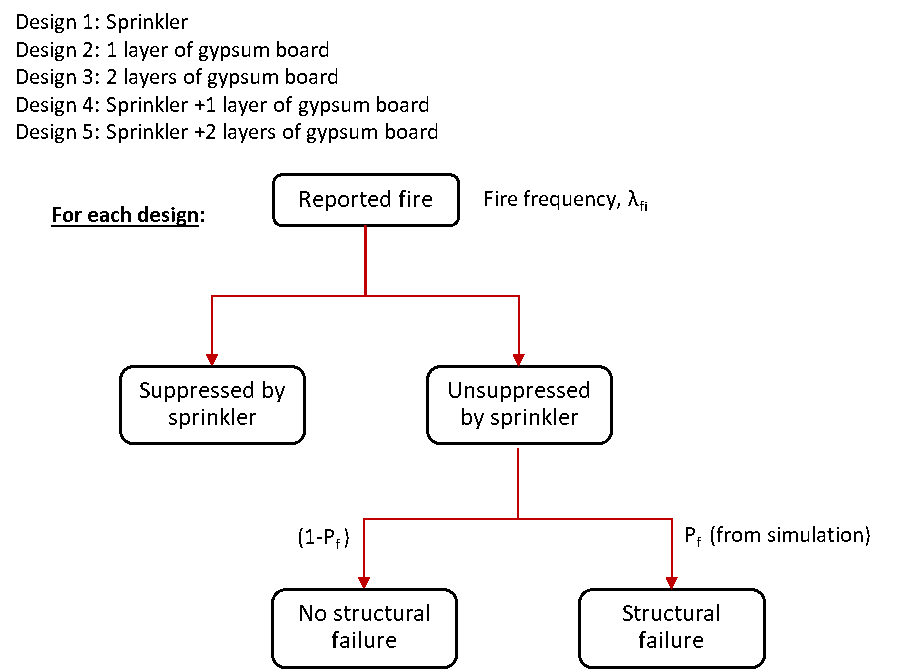

## I. Input
User input in this area.
Note: All monetary values in 2022 USD

### I.1 Building characteristics
High rise apartment building.  
Cost evaluation of structure based on cost of comparable structures and the cost of fire protection measures based on (RSMeans, 2022). See background document.

In [2]:
S_area = 909.52 # [m2] Floor area of structure
Construction_Cost = 1797.54 # [USD/m2] Construction cost; evaluated through (RSMeans, 2022)
Demol_cost = 47.65 # [USD/m2] (RSMeans, 2022) Demolition cost evaluated through (RSMeans, 2022)
Disposal_cost = 8.34  # [USD/m2] (RSMeans, 2022) Disposal cost evaluated through (RSMeans, 2022)

### I.2 Discount rate and obsolescence rate

In [3]:
g = 0.03 # [1/year] continuous discount rate; 3% based on (Fischer, 2014)
o = 0    # [1/year] obsolescence rate; 0% - building obsolescence neglected

### I.3 Cost of fire protection

#### I.3.a Investment cost fire protection

In [4]:
## sprinkler system
c_ins_unitcost= 48.85 # [USD/m2] System installation cost for sprinkler system with wet pipe water sprinkler based on (RSMeans, 2022), assuming light hazard level for the occupancy type.
c_ins = c_ins_unitcost*S_area  # [USD] Total system installation cost

In [5]:
## Encapsulation of timber members with gypsum boards

n_comp = np.array([0, 1, 2]) # Number of levels of encapsulation; 


# Encapsulation wall cost per m2
Cost_wall = np.array([0, 52.66, 90.48]) # [USD/m2] Unit cost of encapsulation; evaluated through (RSMeans, 2022)
c_comp = Cost_wall * S_area # [USD] Total cost of encapsulation (NB: first scenario is no encapsulation)



#### I.3.b Maintenance cost fire protection

In [6]:
## sprinkler system
m_sp= 0.05 * c_ins # [USD per year] annual maintenance cost; 5% of sprinkler installation cost based on (Hopkin, 2019)- maintenance cost assumed to include replacement of parts for system lifetime extension
m_com=0 * c_comp # [USD per year] annual maintenance considered for encapsulation (NB: no maintenance cost for encapsulation)

### I.4 Benefit of fire protection
Benefit evaluation as reduction in cost of fire losses, assessed through flowchart listed in the Introduction.
<br> See background document for discussion.

#### I.4.a Fire frequency

In [7]:
## fire frequency
lambda_fi= 0.00151 # [1/year] fire frequency for storage (ignition frequency + unsuccessful immediate suppression by occupants); 0.00156 based on (Manes and Rush, 2019) 

#### I.4.b Fire barrier reliability

In [8]:
## sprinkler reliability
psup_sp = 0.95 # [-] probability of succesful fire suppression by sprinklers; 0.92-0.98 based on (Vassart et al., 2012)

## encapsulation reliability
pf_encap = np.array([0.24,0.02,0]) # probability of building failing with encapsulation of timber members

#### I.4.c Fire-induced losses

In [9]:
## valuation of risk to life
VSL = 5.657*10**6 # [2022 USD] Value of Statistical Life (VSL); 5.657*10**6 based on (ISO 2394:2015) 
xi_in = (0.047 * VSL) # [2022 USD] valuation of average injury risk; 0.047*VSL based on (Zhuang et al., 2017)

In [10]:
## [fatalities/fire]
Nf_civilian = 7.4/1000 # [fatality/fire] probability of civilian fatalities; 7.4 fatalities per 1000  fires based on (NFPA 2022)
Nf_firefighter_onground = 2.4/1e5 # [fatality/fire] probability of firefighter fireground fatality; 2.4/1e5 based on (NFPA, 2022)
Nf_firefighter_response = 2.2/1e5 # [fatality/fire] probability of firefighter response fatality; 2.2/1e5 based on (NFPA, 2022)

In [11]:
## [injuries/fire]
Ni_civilian = 3/100 # [injury/fire] civilian injuries; 3 injuries per 100 reported fires based on (NFPA, 2022)
Ni_firefighter_onground = 1.62/100 # [injury/fire] firefighter fireground injuries; 1.62 injuries per 100 reported fires based on (NFPA, 2022)
Ni_firefighter_response = 0.37/100  # [injury/fire] firefighter response injuries; 3.7 injuries per 1000 reported fires based on (NFPA, 2022)

In [12]:
## property loss
S_loss_0 = S_area # [m2] average damage area in case of no sprinkler suppression; 
S_loss_s = 4.92 # [m2] average damage area in case of sprinkler suppression; 

S_loss_comp = 23.8 # [m2] average damage area in case of encapsulation preventing structural failure

eps_loss_content = 1.5 # [-] property loss multiplication factor; eps_loss = ((building loss + content loss) / building loss); 1.5 based on (FEMA, 2015)
eps_loss_indirect = 1.1  # [-] total property loss multiplication factor accounting for indirect costs; 1.1 based on (Ramachandran and Hall, 2002)

## II. Design fire risk evaluation

### II.1 Calculation of fire scenario parameters

In [13]:
# Unit replacement cost
Replace_cost = Construction_Cost + Demol_cost + Disposal_cost # [USD/m2] replacement cost as sum of demolition, disposal and reconstruction

# Compartment area
comp_area = S_loss_comp 

# survival probability
p_encap = 1-pf_encap # probability of building not failing with encapsulation of timber members

### II.2 Scenario consequence evalluation
Evaluation of consequences for identified scenarios (event tree- Scenarios I, II and III)

#### II.2.a Scenario I "Suppression by sprinkler"

In [14]:
### Fatalities and injuries
# Fatalities
Nf_sup = 0 + Nf_firefighter_response # [fatality/fire] total fatality rate with sprinkler suppression
# Injuries
redux_Nin_civ=0.57 # [-] reduction factor for civilian injuries; 57% reduction in civilian injuries, based on (Butry, 2009)
Nin_sup = ((1-redux_Nin_civ)*Ni_civilian) + Ni_firefighter_response # [injury/fire] total injury rate with sprinkler suppression

### Valuation of fatalities and injuries
Df_sup=Nf_sup*VSL # [USD/fire] valuation expected life loss
Din_sup = Nin_sup*xi_in # [USD/fire] valuation expected injuries

### Material loss
xi_d_sup =  S_loss_s * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss given fire

### Total loss valuation
D_I=Df_sup+Din_sup+xi_d_sup # [USD] expected value fire-induced loss, scenario I "fire suppressed by sprinkler"

#### II.2.b Scenario II "Not suppressed by sprinklers, but encapsulation prevents building failure"

In [15]:
### Fatalities and injuries
# Fatalities
Nf_sup_encap = Nf_civilian + Nf_firefighter_onground + Nf_firefighter_response # [fatality/fire] total fatality rate without sprinkler suppression 
# Injuries
Nin_sup_encap = Ni_civilian + Ni_firefighter_onground + Nf_firefighter_response # [injury/fire] total injury rate without sprinkler suppression 

### Valuation of fatalities and injuries
Df_sup_encap=Nf_sup_encap*VSL # [USD/fire] valuation expected life loss
Din_sup_encap = Nin_sup_encap*xi_in # [USD/fire] valuation expected injuries

### Material loss
xi_d_sup_encap =  S_loss_comp * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss

### Total loss valuation
D_II=Df_sup_encap+Din_sup_encap+xi_d_sup_encap # [USD] expected value fire-induced loss, scenario II "fire not suppressed by sprinklers but ecapsulation prevents building failure"


#### II.2.c Scenario III "Not suppressed, building fails"

In [16]:
### Fatalities and injuries
# Fatalities
Nf_unsup_encap = Nf_civilian + Nf_firefighter_onground + Nf_firefighter_response # [fatality/fire] total fatality rate without sprinkler suppression
# Injuries
Nin_unsup_encap = Ni_civilian + Ni_firefighter_onground + Nf_firefighter_response # [injury/fire] total injury rate without sprinkler suppression

### Valuation of fatalities and injuries
Df_unsup_encap=Nf_unsup_encap*VSL # [USD/fire] valuation expected life loss
Din_unsup_encap = Nin_unsup_encap*xi_in # [USD/fire] valuation expected injuries

### Material loss
xi_d_unsup_encap = S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss

### Total loss valuation
D_III=Df_unsup_encap+Din_unsup_encap+xi_d_unsup_encap # [USD] expected value fire-induced loss, scenario III "fire not suppressed"

## III. PNV calculation

### Total safety system cost *C+A*

#### III.1.a Investment cost, *C<sub>I</sub>*

In [17]:
C_I_sp=c_ins # PNV investment cost for sprinkler system
C_I_com=c_comp # PNV investment cost for encapsulation  

#### III.1.b PNV maintenance cost, *C<sub>M</sub>*

In [18]:
C_M_sp=m_sp/g # PNV of maintenace cost for sprinkler system
C_M_com=m_com/g # PNV of maintenace cost for encapsulation

#### III.1.c Obsolescence cost, *C<sub>A</sub>*

In [19]:
C_A_sp=C_I_sp*o/g # PNV of obsolescence cost sprinkler system
C_A_com=C_I_com*o/g # PNV of obsolescence cost encapsulation

#### III.1.d Total safety system cost *C+A*

In [20]:
net_C_a=C_I_sp+ C_M_sp + C_A_sp # Sprinkler only (Design a)
net_C_b = C_I_com + C_M_com + C_A_com # encapsulation only (Design b) - first entry is the reference design of no level of encapsulation
net_C_c = net_C_a + net_C_b # Sprinkler and encapsulation both (Design c)


#### III.2 Net Benefit B-D

#### III.2.a Fire induced losses reference design, *B* (no sprinkler system and no encapsulation)

In [21]:
# Expected loss reference design
Dref  = ((p_encap[0]) * D_II)+((1-p_encap[0])*D_III)

# Present net value of reference design
B = Dref * lambda_fi/g # [USD] PNV fire-induced losses reference design

#### III.2.b Fire-induced losses trial designs

In [22]:
## Expected losses with design A, B and C
# Design a (Sprinkler system only)
Da = psup_sp * D_I + (1-psup_sp) *  (p_encap[0] * D_II+(1-p_encap[0])*D_III)

# Design b (encapsulation only)
Db  =  (p_encap * D_II) + ((1-p_encap) * D_III)

# Design c (Fire sprinkler and encapsulation both)
Dc  = (psup_sp * D_I) + (1-psup_sp) * (p_encap * D_II + (1-p_encap) * D_III)


In [23]:
## PNV of design a, b and c
D_a = Da *lambda_fi/g  # [USD] PNV expected risk for alternative design a (sprinkler system only)
D_b = Db *lambda_fi/g  # [USD] PNV expected risk for alternative design b (encapsulation only)
D_c = Dc *lambda_fi/g  # [USD] PNV expected risk for alternative design c (sprinkler system and encapsulation)


#### III.2.c PNV net benefit, *B-D*

In [24]:
netB_a = B - D_a # [USD] Net benefit for alternative design a (sprinkler system only)
netB_b = B - D_b # [USD] Net benefit for alternative design b (encapsulation only)
netB_c = B - D_c # [USD] Net benefit for alternative design c (sprinkler system and encapsulation)

## IV. Cost-Benefit evaluation, Z (USD, Present net value)

In [25]:
## PNV of proposed alternative design
Z_a = netB_a - net_C_a # [USD] Present net value for alternative design a (sprinkler system only)
Z_b = netB_b - net_C_b # [USD] Present net value for alternative design b (encapsulation only)
Z_c = netB_c - net_C_c # [USD] Present net value for alternative design c (sprinkler system and encapsulation)

## Benefit cost ratio of proposed alternative design
BCR_a=netB_a/net_C_a 
BCR_b=netB_b[1:]/net_C_b[1:]
BCR_c=netB_c[1:]/net_C_c[1:]

## Print to screen
print("\nThe PNV for alternative design a (sprinkler system only) is {0:,.0f} [USD]; the BCR is {1:.2f}".format(Z_a,BCR_a))
print("\nThe PNV for alternative design b (encapsulation only) is, with")
for i,Z in enumerate(Z_b[1:]):
    print("\t{0:,.0f} layers: {1:,.0f} [USD]; the BCR is {2:.2f}".format(n_comp[i+1],Z,BCR_b[i]))
print("\nThe PNV for alternative design c (sprinkler system and encapsulation) is, with")
for i,Z in enumerate(Z_c[1:]):
    print("\t{0:,.0f} layers: {1:,.0f} [USD]; the BCR is {2:.2f}".format(n_comp[i+1],Z,BCR_c[i]))



The PNV for alternative design a (sprinkler system only) is -82,248 [USD]; the BCR is 0.31

The PNV for alternative design b (encapsulation only) is, with
	1 layers: -17,900 [USD]; the BCR is 0.63
	2 layers: -49,571 [USD]; the BCR is 0.40

The PNV for alternative design c (sprinkler system and encapsulation) is, with
	1 layers: -128,643 [USD]; the BCR is 0.23
	2 layers: -162,905 [USD]; the BCR is 0.19


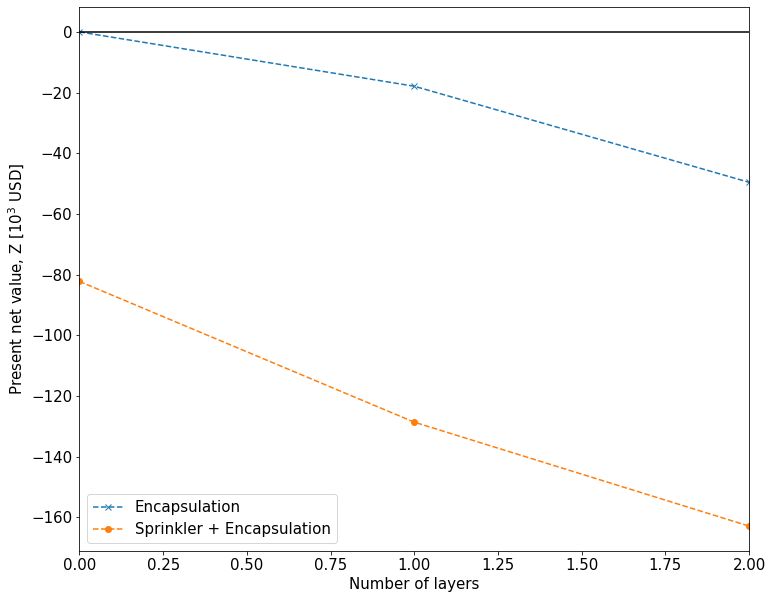

In [26]:
# Plot for cost-benefit of sprinkler and the cost-benefit of encapsulation for failure of both systems
plt.rcParams.update({'font.size': 15})
fig,ax  = plt.subplots(1,1)

#ax.plot([n_comp[0],n_comp[-1]],[Z_a/1000,Z_a/1000],'--',color='r')
ax.plot(n_comp[0:],Z_b/1000,linestyle='--',marker='x')
ax.plot(n_comp[0:],Z_c/1000,linestyle='--',marker='o')

ax.plot([0,2],[0,0],'k')
ax.set_xlim([0,2])
ax.set_xlabel('Number of layers')
ax.set_ylabel('Present net value, Z [$10^3$ USD]')
ax.legend(['Encapsulation','Sprinkler + Encapsulation'])
fig.set_size_inches(12,10)

# Parameter study

### Study 1: Parameter study with number of encapsulation layers, and indirect cost.

#### Function definition PNV Z, to allow parameter study of encapsulation and sprinkler system values

In [27]:
# Function combining above model assumption for parameter study
def Zvalue(p_encap,eps_loss_indirect):
     
    ## II. Design fire risk evaluation ##
    #####################################    
    ## II.2.a Scenario I "suppression by sprinkler"
    ### Material loss
    xi_d_sup =  S_loss_s * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss given fire
    ### Total loss valuation
    D_I=Df_sup+Din_sup+xi_d_sup # [USD] expected value fire-induced loss, scenario I "fire suppressed by sprinkler"    
    
    ## II.2.b Scenario II "Not suppressed by sprinklers, no building failure"
    ### Material loss
    xi_d_sup_encap =  S_loss_comp * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss
    ### Total loss valuation
    D_II=Df_sup_encap+Din_sup_encap+xi_d_sup_encap # [USD] expected value fire-induced loss, scenario II "fire not suppressed by sprinklers but ecapsulation prevents building failure"
    
    ## II.2.c Scenario III "Not suppressed, but failure"
    ### Material loss
    xi_d_unsup_encap = S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss
    ### Total loss valuation
    D_III=Df_unsup_encap+Din_unsup_encap+xi_d_unsup_encap # [USD] expected value fire-induced loss, scenario III "fire not suppressed"    
    
    ## III. PNV calculation ##
    ##########################
    ## III.2.a Fire-induced losses reference design, B
    # Expected loss reference design
    Dref  = ((p_encap[0]) * D_II)+((1-p_encap[0])*D_III)

    # Present net value of reference design
    B = Dref * lambda_fi/g # [USD] PNV fire-induced losses reference design
    
    ## III.2.b Fire-induced losses trial designs
    ## Expected losses with design A, B and C
    
    # Design a (Sprinkler system only)
    Da = psup_sp * D_I + (1-psup_sp) *  (p_encap[0] * D_II+(1-p_encap[0])*D_III)

    # Design b (encapsulation only)
    Db  =  (p_encap * D_II) + ((1-p_encap) * D_III)

    # Design c (Fire sprinkler and encapsulation both)
    Dc  = (psup_sp * D_I) + (1-psup_sp) * (p_encap * D_II + (1-p_encap) * D_III)
    
    ## PNV evaluation
    D_a = Da *lambda_fi/g; D_b = Db *lambda_fi/g; D_c = Dc *lambda_fi/g
    
    ## III.2.c PNV net benefit, B-D
    netB_a = B - D_a; netB_b = B - D_b; netB_c = B - D_c
    
    ## IV. Cost-Benefit evaluation ##
    #################################  
    ## PNV of proposed alternative design
    Z_a = netB_a - net_C_a # [USD] Present net value for alternative design a (sprinkler system only)
    Z_b = netB_b - net_C_b # [USD] Present net value for alternative design b (encapsulation only)
    Z_c = netB_c - net_C_c # [USD] Present net value for alternative design c (sprinkler system and encapsulation)

    ## Benefit cost ratio of proposed alternative design
    BCR_a=netB_a/net_C_a 
    BCR_b=netB_b[1:]/net_C_b[1:]
    BCR_c=netB_c[1:]/net_C_c[1:]
    
    return Z_a,Z_b,Z_c,BCR_a,BCR_b,BCR_c



In [28]:
## Test of Zvalue code

# input
p_encap_var=p_encap
eps_loss_indirect=1.1

# calculation
Z_a,Z_b,Z_c,BCR_a,BCR_b,BCR_c=Zvalue(p_encap_var,eps_loss_indirect)

## Print to screen
print("\nThe PNV for alternative design a (sprinkler system only) is {0:,.0f} [USD]; the BCR is {1:.2f}".format(Z_a,BCR_a))
print("\nThe PNV for alternative design b (encapsulation only) is, with")
for i,Z in enumerate(Z_b[1:]):
    print("\t{0:,.0f} layers: {1:,.0f} [USD]; the BCR is {2:.2f}".format(n_comp[i+1],Z,BCR_b[i]))
print("\nThe PNV for alternative design c (sprinkler system and encapsulation) is, with")
for i,Z in enumerate(Z_c[1:]):
    print("\t{0:,.0f} layers: {1:,.0f} [USD]; the BCR is {2:.2f}".format(n_comp[i+1],Z,BCR_c[i]))


The PNV for alternative design a (sprinkler system only) is -82,248 [USD]; the BCR is 0.31

The PNV for alternative design b (encapsulation only) is, with
	1 layers: -17,900 [USD]; the BCR is 0.63
	2 layers: -49,571 [USD]; the BCR is 0.40

The PNV for alternative design c (sprinkler system and encapsulation) is, with
	1 layers: -128,643 [USD]; the BCR is 0.23
	2 layers: -162,905 [USD]; the BCR is 0.19


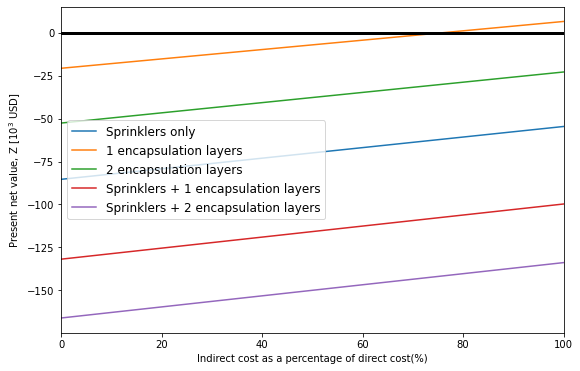

In [30]:
# Indirect cost, encapsulation value, sprinkler value
# %matplotlib qt 
%matplotlib inline
p_encap_var = np.array([0.76, 0.98,1])
Ind_cost_var = np.array(range(0,105,5)) # [%] indirect cost factor as percentage of total direct cost


legends = []

eps_loss_indirect_var = 1+Ind_cost_var/100
Z_b_var=np.zeros((len(n_comp),len(Ind_cost_var)))

Z_c_var=np.zeros((len(n_comp),len(Ind_cost_var)))

for j,eps in enumerate(eps_loss_indirect_var):
    out = Zvalue(p_encap_var,eps)
    Z_b_var[:,j]=out[1]
    Z_c_var[:,j] = out[2]

fig,ax = plt.subplots(1,1)

for i,comp in enumerate(n_comp[0:1]):
    ax.plot(Ind_cost_var,Z_c_var[i,:]/1000)
    legends.append('Sprinklers only')
    
for i,comp in enumerate(n_comp[0:2]):
    ax.plot(Ind_cost_var,Z_b_var[i+1,:]/1000)
    legends.append(str(comp+1)+' encapsulation layers')
    
for i,comp in enumerate(n_comp[0:2]):
    ax.plot(Ind_cost_var,Z_c_var[i+1,:]/1000)
    legends.append('Sprinklers + '+str(comp+1)+' encapsulation layers')
    
    

ax.legend(legends,fontsize=12)
ax.plot([0,100],[0,0],linestyle='solid',color='k',linewidth=3.0)

#ax.grid(which='both',axis='both')

ax.set_xlim([0,100])

ax.set_xlabel('Indirect cost as a percentage of direct cost(%)')
ax.set_ylabel('Present net value, Z [$10^3$ USD]')



fig.set_size_inches(9,6)

